In [46]:
%pip install matplotlib
%pip install pymongo

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


614


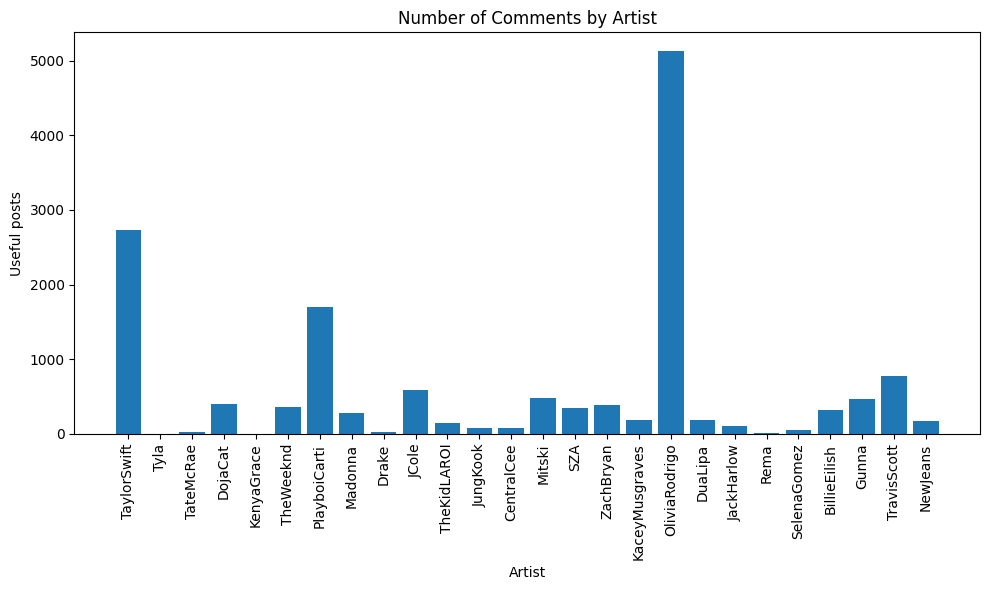

In [47]:
import matplotlib.pyplot as plt
import json
import pymongo

comments_by_artist = {}
conn = pymongo.MongoClient('mongodb://127.0.0.1:27017/')
db = conn.chestnut
collection = db.artists_posts
data = list(collection.find())
document_count = collection.count_documents({})
print(document_count)

# Parse the JSON data and calculate the total comments for each artist
for entry in data:
    # print(entry)
    artist = entry.get("artist")
    num_comments = entry.get("number_of_comments")
    if artist in comments_by_artist:
        comments_by_artist[artist] += num_comments
    else:
        comments_by_artist[artist] = num_comments

# Extract artist names and comment counts
artists = list(comments_by_artist.keys())
comments = list(comments_by_artist.values())

# Create a bar chart
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(artists, comments)
plt.xticks(rotation=40)  # Rotate x-axis labels for better readability
plt.xlabel('Artist')
plt.ylabel('Useful posts')
plt.title('Number of Comments for Artist')
plt.xticks(rotation=90)

# Show the chart
plt.tight_layout()

plt.show()


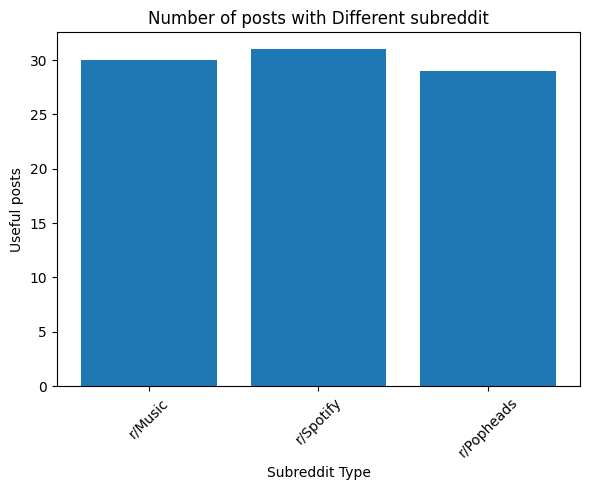

In [48]:
import matplotlib.pyplot as plt
import json
import pymongo

conn = pymongo.MongoClient('mongodb://127.0.0.1:27017/')
db = conn.chestnut
collection = db.artists_posts
data = list(collection.find())
post_related_to_Music = db.rMusic.count_documents({})
post_related_to_Spotify = db.rSpotify.count_documents({})
post_related_to_popheads = db.rPopheads.count_documents({})


types = ["r/Music", "r/Spotify", "r/Popheads"]
comments = [post_related_to_Music, post_related_to_Spotify, post_related_to_popheads]

plt.figure(figsize=(6, 5)) 
plt.bar(types, comments)
plt.xticks(rotation=40) 
plt.xlabel('Subreddit Type')
plt.ylabel('Useful posts')
plt.title('Number of posts with Different subreddit')
plt.xticks(rotation=45)

# Show the chart
plt.tight_layout()
plt.show()


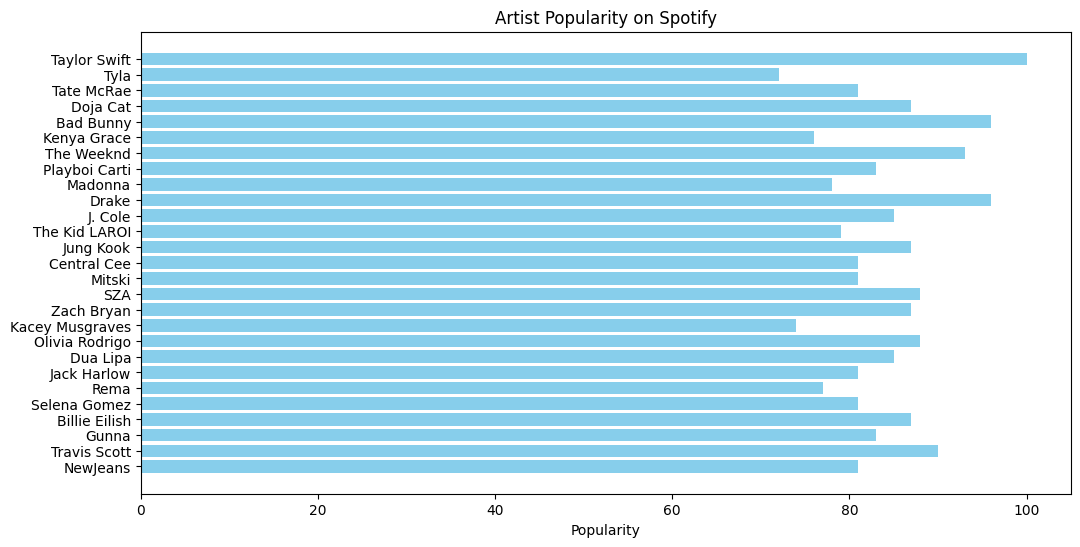

In [49]:
import matplotlib.pyplot as plt
import pymongo

conn = pymongo.MongoClient('mongodb://127.0.0.1:27017')
db = conn.chestnut
collection = db.artists_details
data = list(collection.find())

artists = [entry['name'] for entry in data]
popularity = [entry['popularity'] for entry in data]

plt.figure(figsize=(12, 6))
plt.barh(artists, popularity, color='skyblue')
plt.xlabel('Popularity')
plt.title('Artist Popularity on Spotify')
plt.gca().invert_yaxis() 

plt.show()
